# Importing Database

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
drugs = pd.read_csv("../data/correlation_dataset.csv")
drugs = drugs.drop(drugs.columns[drugs.columns.str.contains("follow")], axis=1)
drugs.head()

,Unnamed: 0,active_ingredient_moiety,nda_bla,approval_year,active,DrugBank ID,Drug Groups,SMILES,Name,Drug Type,route,mw,n_hba,n_hbd,logp,tpsa,rb,h_sum,countplot
0,0,troglitazone,NDA,1997,troglitazone,DB00197,approved; investigational; withdrawn,CC1=C(C)C2=C(CCC(C)(COC3=CC=C(CC4SC(=O)NC4=O)C...,Troglitazone,SmallMoleculeDrug,oral,441.160994,6,2,4.37426,84.86,5,8,3
1,1,imiquimod,NDA,1997,imiquimod,DB00724,approved; investigational,CC(C)CN1C=NC2=C1C1=C(C=CC=C1)N=C2N,Imiquimod,SmallMoleculeDrug,topical,240.137497,4,1,2.82270,56.73,2,5,3
2,2,anagrelide hydrochloride,NDA,1997,anagrelide,DB00261,approved,ClC1=CC=C2N=C3NC(=O)CN3CC2=C1Cl,Anagrelide,SmallMoleculeDrug,oral,254.996617,3,1,1.92630,44.70,0,4,3
3,3,nelfinavir mesylate,NDA,1997,nelfinavir,DB00220,approved,[H][C@@]12CCCC[C@]1([H])CN(C[C@@H](O)[C@H](CSC...,Nelfinavir,SmallMoleculeDrug,oral,567.313078,6,4,4.74762,101.90,9,10,3
4,4,delavirdine mesylate,NDA,1997,delavirdine,DB00705,approved,CC(C)NC1=C(N=CC=C1)N1CCN(CC1)C(=O)C1=CC2=C(N1)...,Delavirdine,SmallMoleculeDrug,oral,456.194360,6,3,2.71710,110.43,6,9,3


In [3]:
# Creating the sum of hydrogen bond acceptors and donors
drugs['h_sum'] = drugs['n_hba'] + drugs['n_hbd']

# Pairplot and relevant stats

In [4]:
drugs.head()

,Unnamed: 0,active_ingredient_moiety,nda_bla,approval_year,active,DrugBank ID,Drug Groups,SMILES,Name,Drug Type,route,mw,n_hba,n_hbd,logp,tpsa,rb,h_sum,countplot
0,0,troglitazone,NDA,1997,troglitazone,DB00197,approved; investigational; withdrawn,CC1=C(C)C2=C(CCC(C)(COC3=CC=C(CC4SC(=O)NC4=O)C...,Troglitazone,SmallMoleculeDrug,oral,441.160994,6,2,4.37426,84.86,5,8,3
1,1,imiquimod,NDA,1997,imiquimod,DB00724,approved; investigational,CC(C)CN1C=NC2=C1C1=C(C=CC=C1)N=C2N,Imiquimod,SmallMoleculeDrug,topical,240.137497,4,1,2.82270,56.73,2,5,3
2,2,anagrelide hydrochloride,NDA,1997,anagrelide,DB00261,approved,ClC1=CC=C2N=C3NC(=O)CN3CC2=C1Cl,Anagrelide,SmallMoleculeDrug,oral,254.996617,3,1,1.92630,44.70,0,4,3
3,3,nelfinavir mesylate,NDA,1997,nelfinavir,DB00220,approved,[H][C@@]12CCCC[C@]1([H])CN(C[C@@H](O)[C@H](CSC...,Nelfinavir,SmallMoleculeDrug,oral,567.313078,6,4,4.74762,101.90,9,10,3
4,4,delavirdine mesylate,NDA,1997,delavirdine,DB00705,approved,CC(C)NC1=C(N=CC=C1)N1CCN(CC1)C(=O)C1=CC2=C(N1)...,Delavirdine,SmallMoleculeDrug,oral,456.194360,6,3,2.71710,110.43,6,9,3


In [8]:
sns.set_style("ticks")
sns.set_context('talk')

def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.6,0.9), xycoords='axes fraction', ha='center', fontweight=1000, fontsize=19)

    # plt.setp(ax.get_xticklabels(), fontsize=12, fontweight=600)
    # plt.setp(ax.get_yticklabels(), fontsize=12, fontweight=600)
    ax.set_xlabel(ax.xaxis.get_label(), fontsize=28, fontweight=600)
    ax.set_ylabel(ax.yaxis.get_label(), fontsize=28, fontweight=600)

def hide_axis(x, y, label=None, color=None, **kwargs):
    ax = plt.gca()
    ax.set_axis_off()

def diagplot(x, y, label=None, color=None, **kwargs):
    ax = plt.gca()
    plt.hist()
    ax.set_xlabel(ax.xaxis.get_label(), fontsize=28, fontweight=600)
    ax.set_ylabel(ax.yaxis.get_label(), fontsize=28, fontweight=600)

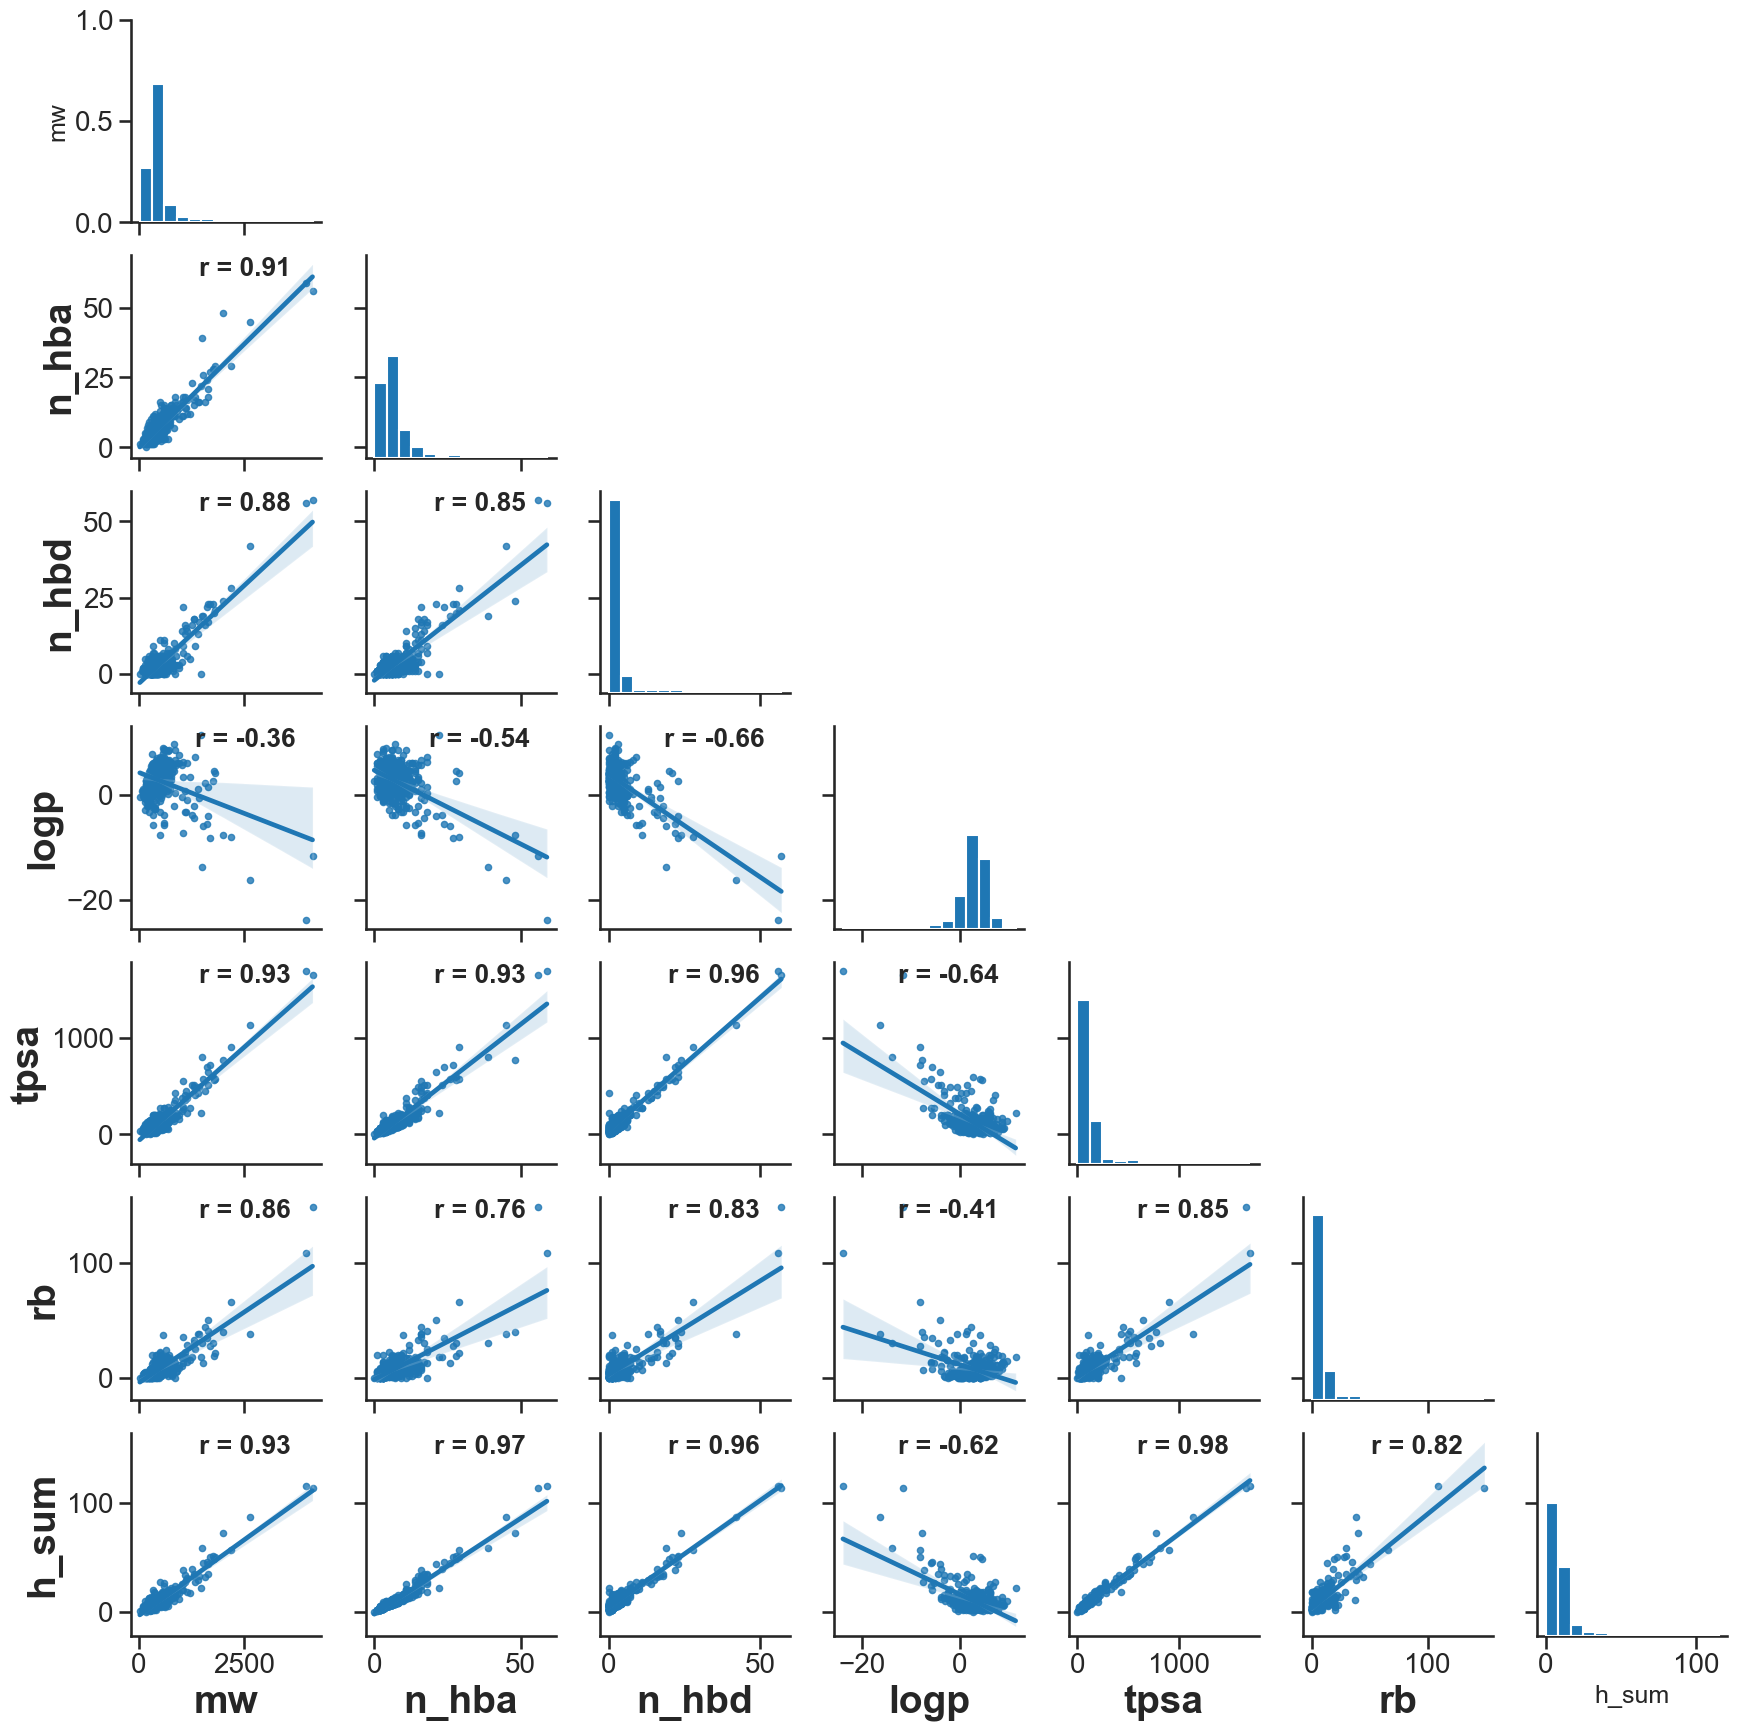

In [11]:
g = sns.PairGrid(drugs[["mw", "n_hba", "n_hbd", "logp", "tpsa", "rb", "h_sum"]])
g.map_lower(reg_coef)
g.map_lower(sns.regplot, scatter_kws={'s':20})
g.map_diag(plt.hist, bins = 14)
g.map_upper(hide_axis)
g.tick_params(labelsize=20, grid_linewidth=10)

g.savefig('../imgs/correlation/correlation_pairwise_plot.png', dpi=300)